# Pymaceuticals Inc.
---

### Analysis

There is a positvie correlation between mouse weight and average tumor size; as one goes up, so does the other. Capomulin was effective in treating tumors, as tumor size reduced in half for Mouse ID s185 over the course of about 50 days. Capomulin and Ramicane were the two most effective drug regimens. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


# Check for Mouse IDs with duplicate Timepoints
duplicates = combined_df[combined_df.duplicated(subset=['Timepoint', 'Mouse ID'], keep=False)]

duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop duplicates based on Mouse ID

# Drop duplicates for Mouse ID 'g989'
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
                         
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_cleaned = clean_df['Mouse ID'].value_counts()
number_of_mice_cleaned



k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [8]:
# Select only the numeric columns for aggregation
numeric_columns = clean_df.select_dtypes(include=[int, float]).columns

# Group by 'Drug Regimen' and calculate summary statistics
summary_df = clean_df.groupby('Drug Regimen')[numeric_columns].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

summary_df

Drug Regimen Age_months                                       Weight (g)  \
                     mean median        var       std       sem       mean   
0    Capomulin  13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
1     Ceftamin  13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
2    Infubinol  16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
3     Ketapril  15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
4     Naftisol  12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
5      Placebo  10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
6     Propriva  10.006757    7.5  48.251655  6.946341  0.570986  27.135135   
7     Ramicane  10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
8     Stelasyn  12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
9    Zoniferol  12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                               ... Tumor Volume (mm3)                        \
  median        var       std  ...               mean     median        var   
0   20.5   7.466034  2.732404  ...          40.675741  41.557809  24.947764   
1   28.0   2.501016  1.581460  ...          52.591172  51.776157  39.290177   
2   27.0   4.769028  2.183810  ...          52.884795  51.820584  43.128684   
3   28.0   3.392536  1.841884  ...          55.235638  53.698743  68.553577   
4   27.0   2.247748  1.499249  ...          54.331565  52.509285  66.173479   
5   28.0   3.378146  1.837973  ...          54.033581  52.288934  61.168083   
6   26.0   2.933995  1.712891  ...          52.320930  50.446266  43.852013   
7   19.0  10.465318  3.235014  ...          40.216745  40.673236  23.486704   
8   28.0   2.701473  1.643616  ...          54.233149  52.431737  59.450562   
9   28.0   2.015300  1.419612  ...          53.236507  51.818479  48.533355   

                      Metastatic Sites                                       
        std       sem             mean median       var       std       sem  
0  4.994774  0.329346         0.713043    0.0  0.720790  0.848993  0.055981  
1  6.268188  0.469821         1.179775    1.0  1.402527  1.184283  0.088766  
2  6.567243  0.492236         0.960674    1.0  1.054942  1.027104  0.076985  
3  8.279709  0.603860         1.297872    1.0  1.942883  1.393873  0.101659  
4  8.134708  0.596466         1.182796    1.0  1.479919  1.216519  0.089200  
5  7.821003  0.581331         1.441989    1.0  1.792449  1.338824  0.099514  
6  6.622085  0.544332         1.013514    1.0  1.224306  1.106484  0.090952  
7  4.846308  0.320955         0.548246    0.0  0.477838  0.691259  0.045780  
8  7.710419  0.573111         0.872928    1.0  0.944874  0.972046  0.072252  
9  6.966589  0.516398         1.230769    1.0  1.559711  1.248884  0.092573  

[10 rows x 26 columns]

## Bar and Pie Charts

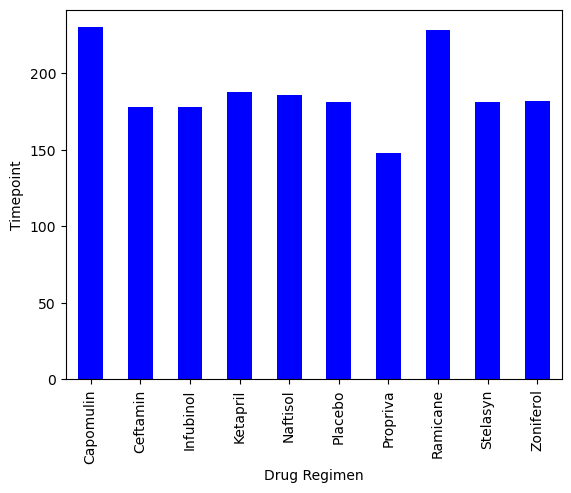

In [9]:
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
count_df = clean_df.groupby('Drug Regimen').size()

# Plot the bar plot
count_df.plot(x='Drug Regimen', y='Timepoint', kind='bar', color='blue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')

# Display the plot
plt.show()



In [10]:
column_names = clean_df.columns
column_names

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

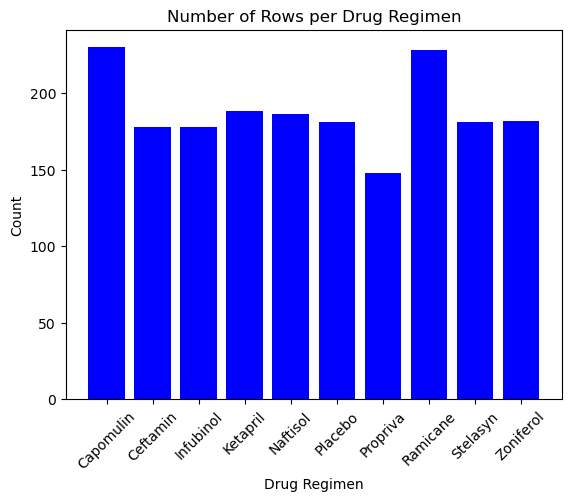

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows
count_df = clean_df.groupby('Drug Regimen').size().reset_index(name='Count')

# Extract drug regimens and counts
drug_regimens = count_df['Drug Regimen']
counts = count_df['Count']

# Plot the bar plot
plt.bar(drug_regimens, counts, color='blue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Number of Rows per Drug Regimen')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

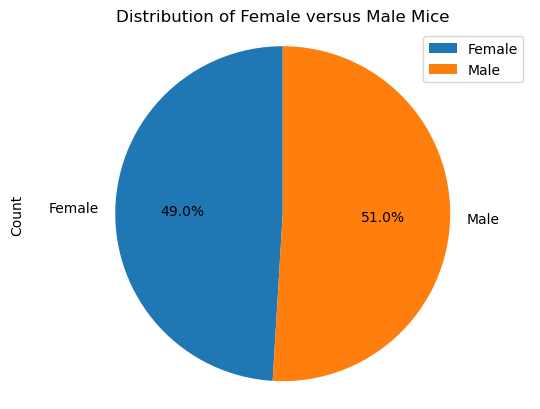

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by 'Sex' and count the number of mice
count_df = clean_df.groupby('Sex').size().reset_index(name='Count')

# Plot the pie plot
count_df.plot(kind='pie', y='Count', labels=count_df['Sex'], autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures a circular pie
plt.axis('equal')

# Display the plot
plt.show()


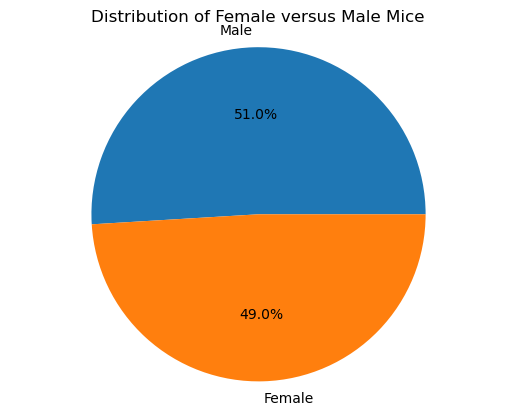

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by 'Sex' and count the number of mice
count_df = clean_df.Sex.value_counts()

# Plot the pie plot
plt.pie(count_df.values, labels=count_df.index.values, autopct='%1.1f%%')

# Set plot title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures a circular pie
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Assuming the dataset is stored in a DataFrame called 'data'
# Filter the dataset to include only the last timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Create a mask to filter the dataset for the final timepoint
mask = clean_df['Timepoint'].isin(last_timepoints)

# Filter the dataset for the final timepoint
final_timepoint_data = clean_df[mask]

# Filter the dataset for the four drug regimens of interest
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = final_timepoint_data[final_timepoint_data['Drug Regimen'].isin(drug_regimens)]

# Extract the final tumor volumes for each mouse
tumor_volumes = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Print the final tumor volumes
tumor_volumes


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_df, tumor_volumes, on="Timepoint", how="inner")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,0,45.000000,0
2,k403,Ramicane,Male,21,16,0,45.000000,0
3,k403,Ramicane,Male,21,16,0,45.000000,0
4,k403,Ramicane,Male,21,16,0,45.000000,0
...,...,...,...,...,...,...,...,...
40163,z969,Naftisol,Male,9,30,45,73.867845,4
40164,z969,Naftisol,Male,9,30,45,73.867845,4
40165,z969,Naftisol,Male,9,30,45,73.867845,4
40166,z969,Naftisol,Male,9,30,45,73.867845,4


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_df.loc[merged_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
    
    # add subset 
    data.append(final_tumor_volume)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

Values below 23.813809285000005 could be outliers.
Values above 54.880338205 could be outliers.
Values below 19.334691524999997 could be outliers.
Values above 57.275253245 could be outliers.
Values below 26.974642339999995 could be outliers.
Values above 86.43717442000002 could be outliers.
Values below 28.31287333499999 could be outliers.
Values above 84.56355513500002 could be outliers.


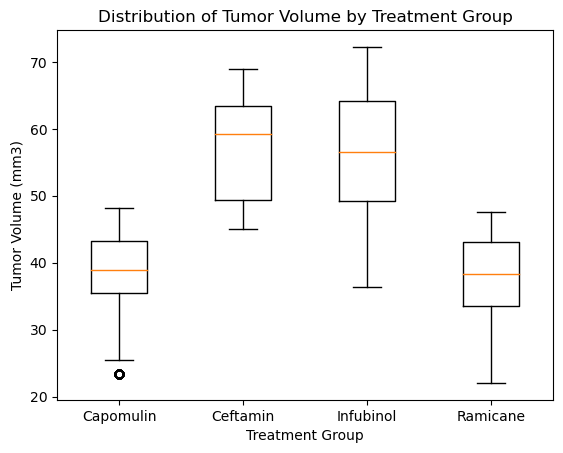

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Filter the merged_df DataFrame for the specified treatments
filtered_df = merged_df[merged_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Group the filtered DataFrame by "Drug Regimen"
grouped_df = filtered_df.groupby("Drug Regimen")

# Create a list of tumor volumes for each treatment group
data = [group["Tumor Volume (mm3)"].tolist() for _, group in grouped_df]

# Generate the box plot
plt.boxplot(data, labels=grouped_df.groups.keys())

# Add labels and title
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Treatment Group")

# Display the plot
plt.show()



## Line and Scatter Plots

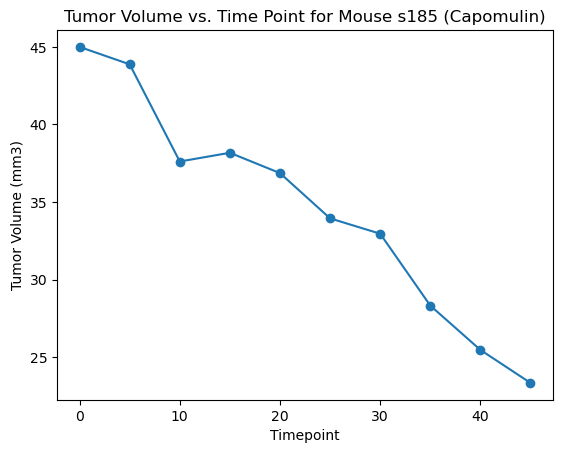

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the combined_df DataFrame for Capomulin and mouse s185
filtered_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin") & (combined_df["Mouse ID"] == "s185")]

# Create the line plot
plt.plot(filtered_df["Timepoint"], filtered_df["Tumor Volume (mm3)"], marker='o')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse s185 (Capomulin)")

# Display the plot
plt.show()



In [18]:
# Filter the DataFrame for Capomulin treatment
capomulin_mice = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()

# Print the Mouse IDs
print(capomulin_mice)


['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


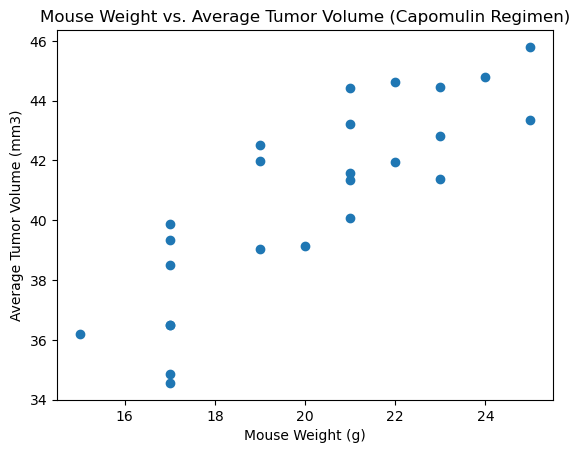

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the combined_df DataFrame for Capomulin regimen
capomulin_df = combined_df[combined_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Display the plot
plt.show()


## Correlation and Regression

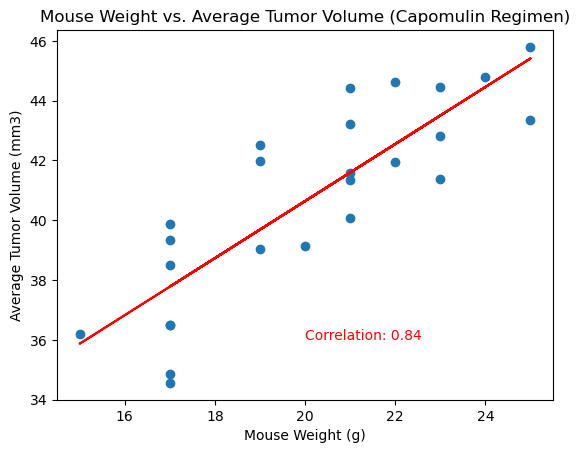

In [20]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Filter the combined_df DataFrame for Capomulin regimen
capomulin_df = combined_df[combined_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = stats.pearsonr(mouse_weight, avg_tumor_volume)[0]

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Add the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, avg_tumor_volume)
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

# Add correlation coefficient to the plot
plt.text(20, 36, f"Correlation: {correlation:.2f}", color='red')

# Display the plot
plt.show()
